In [60]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble.forest import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/apple/Downloads/large_second_onemonth.csv', encoding='latin-1')
df.head()

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
0,15720,01/27/2016 04:12:36 PM,01/27/2016 04:17:21 PM,285,1444E,NaN,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,2.0,False,True
1,12826,01/22/2016 06:35:26 AM,01/22/2016 07:08:51 AM,2005,1555W,NaN,Magistrates,1285.0,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5.0,False,True
2,11655,01/24/2016 09:19:51 AM,01/24/2016 11:04:19 AM,6268,C2668,2P SUN 7:30-18:30,Princes Theatre,894.0,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1.0,False,False
3,9869,01/19/2016 12:20:49 PM,01/19/2016 12:39:58 PM,1149,1449W,1/2P MTR M-F 10:00-16:00,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,5.0,False,True
4,14338,01/14/2016 04:55:14 PM,01/14/2016 05:03:46 PM,512,13381W,LZ 15M M-SAT 7:30-18:30,Docklands,1383.0,VILLAGE STREET,COLLINS STREET,BRENTANI WAY,5.0,False,True


In [32]:
df.isnull().sum()

DeviceId           0
ArrivalTime        0
DepartureTime      0
DurationSeconds    0
StreetMarker       0
Sign               0
Area               0
StreetId           0
StreetName         0
BetweenStreet1     0
BetweenStreet2     0
Side Of Street     0
In Violation       0
Vehicle Present    0
Date               0
Time               0
Day                0
DayOfWeek          0
Weekend/Weekday    0
session            0
dtype: int64

In [ ]:
df[df["DurationSeconds"] < 5].sum() 

In [3]:
#converting categorical values into interger
df['In Violation'] = df['In Violation'].astype(int)
df['Vehicle Present'] = df['Vehicle Present'].astype(int)

In [4]:
#converting arrival and depature time into data type timestamp
df['ArrivalTime'] =  pd.to_datetime(df['ArrivalTime'], format='%m/%d/%Y %I:%M:%S %p')
df['DepartureTime'] =  pd.to_datetime(df['DepartureTime'], format='%m/%d/%Y %I:%M:%S %p')

In [5]:
#storting values by arrival time
df.sort_values(by='ArrivalTime') 

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present
1781540,13478,2016-01-01 00:00:00,2016-01-01 03:25:02,12302,C8058,NaN,West Melbourne,78.0,BATMAN STREET,KING STREET,SPENCER STREET,1.0,0,1
1703489,13144,2016-01-01 00:00:00,2016-01-01 00:18:34,1114,427W,NaN,Windsor,647.0,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5.0,0,1
920891,14257,2016-01-01 00:00:00,2016-01-01 02:32:58,9178,549W,NaN,Regency,647.0,EXHIBITION STREET,Lt LONSDALE STREET,LONSDALE STREET,5.0,0,1
891104,15987,2016-01-01 00:00:00,2016-01-01 03:05:01,11101,C1822,NaN,Tavistock,957.0,MARKET STREET,COLLINS STREET,FLINDERS LANE,1.0,0,1
926652,15105,2016-01-01 00:00:00,2016-01-01 06:57:59,25079,5142E,NaN,Courtney,1062.0,O'CONNELL STREET,PEEL STREET,QUEENSBERRY STREET,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361829,12414,2016-01-31 23:59:24,2016-02-01 00:00:00,36,C6632,NaN,Titles,681.0,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1.0,0,0
2535398,14531,2016-01-31 23:59:35,2016-02-01 00:00:00,25,13880N,NaN,Docklands,1460.0,MARMION PLACE,AQUITANIA WAY,NaN,3.0,0,0
1118813,13967,2016-01-31 23:59:38,2016-02-01 00:00:00,22,13218N,NaN,Docklands,123.0,BOURKE STREET,HARBOUR ESPLANADE,WURUNDJERI WAY,3.0,0,0
477509,16944,2016-01-31 23:59:45,2016-02-01 00:00:00,15,C1100,NaN,McKillop,1171.0,QUEEN STREET,Lt COLLINS STREET,COLLINS STREET,1.0,0,0


In [6]:
# creating new features like date, time, month, day and day of the week 

df['Date'] = [d.date() for d in df['ArrivalTime']]
df['Time'] = [d.time() for d in df['ArrivalTime']]
df['Day'] = df['ArrivalTime'].dt.day
df['DayOfWeek'] = df['ArrivalTime'].dt.dayofweek

In [7]:
df.head()

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present,Date,Time,Day,DayOfWeek
0,15720,2016-01-27 16:12:36,2016-01-27 16:17:21,285,1444E,NaN,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,2.0,0,1,2016-01-27,16:12:36,27,2
1,12826,2016-01-22 06:35:26,2016-01-22 07:08:51,2005,1555W,NaN,Magistrates,1285.0,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5.0,0,1,2016-01-22,06:35:26,22,4
2,11655,2016-01-24 09:19:51,2016-01-24 11:04:19,6268,C2668,2P SUN 7:30-18:30,Princes Theatre,894.0,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1.0,0,0,2016-01-24,09:19:51,24,6
3,9869,2016-01-19 12:20:49,2016-01-19 12:39:58,1149,1449W,1/2P MTR M-F 10:00-16:00,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,5.0,0,1,2016-01-19,12:20:49,19,1
4,14338,2016-01-14 16:55:14,2016-01-14 17:03:46,512,13381W,LZ 15M M-SAT 7:30-18:30,Docklands,1383.0,VILLAGE STREET,COLLINS STREET,BRENTANI WAY,5.0,0,1,2016-01-14,16:55:14,14,3


In [8]:
#assigning weekday = 0 and weekend = 1
df['Weekend/Weekday'] = np.where(df.DayOfWeek >= 5 , 1, 0)

# Creating new column to to sepecify mrng, evng or night (mrng = 1, afternoon = 2, evng = 3)
df=df.assign(session=pd.cut(df.ArrivalTime.dt.hour,
                            [6,12,16,24],
                            labels=['1','2','3'],
                            include_lowest=True))
df.head()

,DeviceId,ArrivalTime,DepartureTime,DurationSeconds,StreetMarker,Sign,Area,StreetId,StreetName,BetweenStreet1,BetweenStreet2,Side Of Street,In Violation,Vehicle Present,Date,Time,Day,DayOfWeek,Weekend/Weekday,session
0,15720,2016-01-27 16:12:36,2016-01-27 16:17:21,285,1444E,NaN,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,2.0,0,1,2016-01-27,16:12:36,27,2,0,2
1,12826,2016-01-22 06:35:26,2016-01-22 07:08:51,2005,1555W,NaN,Magistrates,1285.0,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5.0,0,1,2016-01-22,06:35:26,22,4,0,1
2,11655,2016-01-24 09:19:51,2016-01-24 11:04:19,6268,C2668,2P SUN 7:30-18:30,Princes Theatre,894.0,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1.0,0,0,2016-01-24,09:19:51,24,6,1,1
3,9869,2016-01-19 12:20:49,2016-01-19 12:39:58,1149,1449W,1/2P MTR M-F 10:00-16:00,Family,839.0,KING STREET,BOURKE STREET,Lt COLLINS STREET,5.0,0,1,2016-01-19,12:20:49,19,1,0,1
4,14338,2016-01-14 16:55:14,2016-01-14 17:03:46,512,13381W,LZ 15M M-SAT 7:30-18:30,Docklands,1383.0,VILLAGE STREET,COLLINS STREET,BRENTANI WAY,5.0,0,1,2016-01-14,16:55:14,14,3,0,2


In [9]:
#converting the new features into categorical values

df['Weekend/Weekday'] = df['Weekend/Weekday'].astype('category')
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['Day'] = df['Day'].astype('category')

df['Vehicle Present'] = df['Vehicle Present'].astype('category')
df['In Violation'] = df['In Violation'].astype('category')
df['StreetId'] = df['StreetId'].astype('category')
df['Side Of Street'] = df['Side Of Street'].astype('category')
df.dropna(inplace=True)

In [10]:
# dividing the data into target variable and independent variables
X = df.filter(['DurationSeconds',  'StreetId', 'Side Of Street', 'In Violation',  'Month', 
              'Day', 'DayOfWeek', 'Weekend/Weekday', 'session'])
y =df.loc[:, df.columns == 'Vehicle Present']


In [11]:
# scaling the feautres using minmax
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X_clean = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [12]:
#X.dropna(inplace=True)

In [13]:
X_clean.head()

,DurationSeconds,StreetId,Side Of Street,In Violation,Day,DayOfWeek,Weekend/Weekday,session
0,0.001494,0.612259,0.0,0.0,0.766667,1.000000,1.0,0.0
1,0.000274,0.574380,1.0,0.0,0.600000,0.166667,0.0,0.0
2,0.000122,0.949036,1.0,0.0,0.433333,0.500000,0.0,0.5
3,0.000156,0.081267,0.5,0.0,0.866667,0.333333,0.0,1.0
4,0.000022,0.586088,0.5,0.0,0.533333,1.000000,1.0,0.0


In [14]:
# splitting the data set into ratio 75:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.ensemble.forest import RandomForestClassifier, RandomForestRegressor
rf_exp = RandomForestRegressor(n_estimators= 10, random_state=100)
rf_exp.fit(X_train,y_train.values.ravel())

predictions = rf_exp.predict(X_test)

Confusion matrix
[[146950  76527]
 [ 90745 138235]]


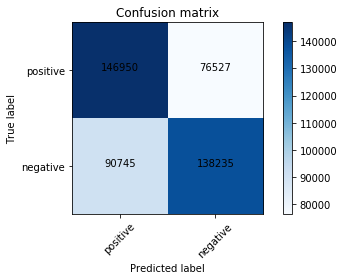

In [31]:
#Evaluation of Model - Confusion Matrix Plot
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions.round())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['positive','negative'],
                      title='Confusion matrix')

In [70]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
score = f1_score(y_test, predictions.round(), average='binary')
precision = precision_score(y_test, predictions.round(), average='binary')
recall = recall_score(y_test, predictions.round(), average='binary')

print('Precision for Random Forests: %.3f' % precision)
print('Recall for Random Forests: %.3f' % recall)
print('F-Measure for Random Forests: %.3f' % score)

Precision for Random Forests: 0.644
Recall for Random Forests: 0.604
F-Measure for Random Forests: 0.623


In [72]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predictions.round())
print('Accuracy score for Random Forests: %.3f' % acc_score)

Accuracy score for Random Forests: 0.630


In [19]:
print(y_test)

        Vehicle Present
1898982               1
1654954               1
1722631               1
2150175               1
2263894               0
...                 ...
1423628               1
584729                0
1377215               1
594834                0
764023                0

[452457 rows x 1 columns]


In [34]:
dff = df.filter(['ArrivalTime',  'Vehicle Present'])

In [35]:
dff.head()

,ArrivalTime,Vehicle Present
2,2016-01-24 09:19:51,0
3,2016-01-19 12:20:49,1
4,2016-01-14 16:55:14,1
6,2016-01-27 22:49:04,1
7,2016-01-17 09:25:46,1


In [36]:
dff = dff.sort_values(by='ArrivalTime') 

In [37]:
dff = dff.set_index('ArrivalTime')


In [38]:
dff.head(100)

,Vehicle Present
ArrivalTime,
2016-01-01 06:00:00,0
2016-01-01 06:00:00,0
2016-01-01 06:00:00,0
2016-01-01 06:00:00,0
2016-01-01 06:00:00,0
...,...
2016-01-01 07:21:12,1
2016-01-01 07:21:43,0
2016-01-01 07:22:01,1


In [45]:
dataset = dff['Vehicle Present'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 100
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [46]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping


In [74]:
model = Sequential()
model.add(LSTM(4,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#history = model.fit(X_train, Y_train, epochs=2, batch_size=5, validation_data=(X_test, Y_test), 
                    #callbacks=[EarlyStopping(monitor='val_loss', patience=20)], verbose=1, shuffle=False)

history = model.fit(X_train, Y_train, epochs=4)
model.summary()

Epoch 1/4
1357267/1357267 [==============================] - 171s 126us/step - loss: 0.2453 - accuracy: 0.5369
Epoch 2/4
1357267/1357267 [==============================] - 166s 123us/step - loss: 0.2450 - accuracy: 0.5380
Epoch 3/4
1357267/1357267 [==============================] - 26794s 20ms/step - loss: 0.2449 - accuracy: 0.5387
Epoch 4/4
1357267/1357267 [==============================] - 17019s 13ms/step - loss: 0.2448 - accuracy: 0.5389
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4)                 1680      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,685
Trainable params: 1,685
Non-trainable params: 0
_________________________________________________________________


In [75]:
LSTM_predict = model.predict(X_test)

Confusion matrix
[[ 33165 188943]
 [ 18595 211653]]


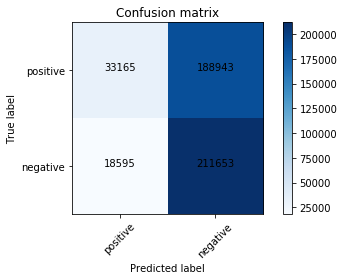

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, LSTM_predict.round())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['positive','negative'],
                      title='Confusion matrix')

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
score = f1_score(Y_test, LSTM_predict.round(), average='binary')
precision = precision_score(Y_test, LSTM_predict.round().round(), average='binary')
recall = recall_score(Y_test, LSTM_predict.round().round(), average='binary')
#score = f1_score(y_test, predictions, average='binary')
print('Precision for LSTM: %.3f' % precision)
print('Recall for LSTM: %.3f' % recall)
print('F-Measure for LSTM: %.3f' % score)

Precision for LSTM: 0.528
Recall for LSTM: 0.919
F-Measure for LSTM: 0.671


In [78]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, LSTM_predict.round())
print('Accuracy score for LSTM: %.3f' % acc_score)

Accuracy score for LSTM: 0.541
